In [1]:
from star_analysis.dataprovider.sdss_dataprovider import SDSSDataProvider

data_provider = SDSSDataProvider()
validation_image, validation_labels = data_provider.get_provided_validation_set()

[INFO][2023-06-11 14:51:05,270] image_downloader.py:download_exact:49: Downloading 8162 6 0080
[INFO][2023-06-11 14:51:41,838] image_downloader.py:_stream_download:149: Downloading https://data.sdss.org/sas/dr17/eboss/photoObj/frames/301/8162/6/frame-g-008162-6-0080.fits.bz2
[INFO][2023-06-11 14:51:41,854] image_downloader.py:_stream_download:149: Downloading https://data.sdss.org/sas/dr17/eboss/photoObj/frames/301/8162/6/frame-r-008162-6-0080.fits.bz2
[INFO][2023-06-11 14:51:41,985] image_downloader.py:_stream_download:149: Downloading https://data.sdss.org/sas/dr17/eboss/photoObj/frames/301/8162/6/frame-i-008162-6-0080.fits.bz2
[INFO][2023-06-11 14:51:42,215] image_downloader.py:_stream_download:149: Downloading https://data.sdss.org/sas/dr17/eboss/photoObj/frames/301/8162/6/frame-u-008162-6-0080.fits.bz2
[INFO][2023-06-11 14:52:00,680] image_downloader.py:_stream_download:149: Downloading https://data.sdss.org/sas/dr17/eboss/photoObj/frames/301/8162/6/frame-z-008162-6-0080.fits.bz2


In [4]:
print(validation_image.shape, validation_labels.shape)

(2046, 1471, 5) (2046, 1471, 2)


In [5]:
from star_analysis.enum.phase import Phase
from star_analysis.service.data_split import DataSplitService

split = DataSplitService().split(validation_image, validation_labels, (128, 128), {Phase.train: 0.8, Phase.validation: 0.2})
split[Phase.train]

ValueError: could not broadcast input array from shape (128,128,7) into shape (128,128)

[WARNING][2023-06-09 13:12:04,196] image.py:set_data:725: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


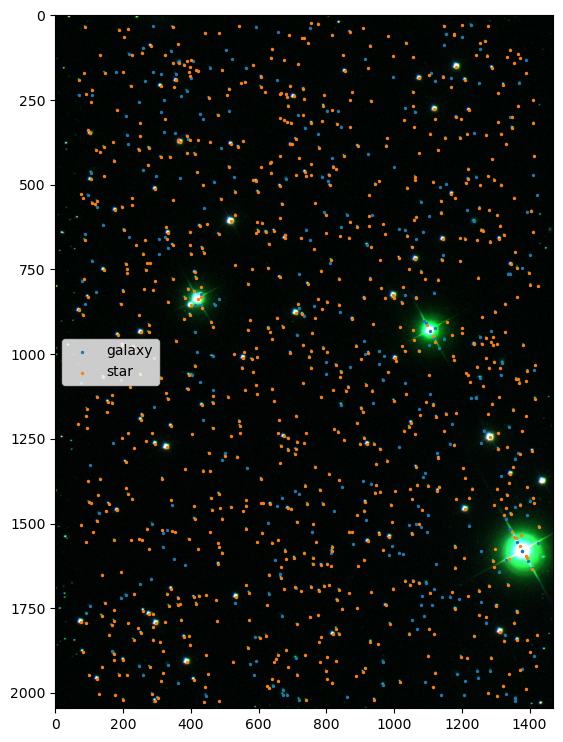

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 9))
plt.imshow(validation_image[:, :, :3])
cls1, cls2 = data_provider.alignment_service.get_demanded_label_vectors(validation_labels)
data_provider.alignment_service.label_encoder

type_to_name = {6: 'star', 3: 'galaxy'}
decoder = {v: k for k, v in data_provider.alignment_service.label_encoder.items()}

plt.scatter(cls1[:, 0], cls1[:, 1], label=type_to_name[decoder[0]], s=2)
plt.scatter(cls2[:, 0], cls2[:, 1], label=type_to_name[decoder[1]], s=2)
plt.legend()